# 서울 지하철 통계 분석

In [2]:
import csv
f = open('../Data/subwayfee.csv', encoding='utf-8')
data = csv.reader(f)

header = next(data)
print(header)

i = 0
for row in data:
    print(row)
    if i > 5:
        break
    i += 1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2022-06', '1호선', '150', '서울역', '1150754', '1123193', '194717', '187155']
['2022-06', '1호선', '151', '시청', '537067', '543569', '80671', '78279']
['2022-06', '1호선', '152', '종각', '834173', '815704', '131987', '121717']
['2022-06', '1호선', '153', '종로3가', '450317', '404106', '299617', '278151']
['2022-06', '1호선', '154', '종로5가', '394420', '404105', '254236', '244555']
['2022-06', '1호선', '155', '동대문', '212719', '198987', '117499', '118515']
['2022-06', '1호선', '156', '신설동', '264825', '252339', '112362', '106855']


### 유임 승차 대 무임 승차 비율이 가장 높은 역은?
- $rate = {유임승차인원 \over 무임승차인원}$

In [3]:
try:
    import csv
    f = open('../Data/subwayfee.csv', encoding='utf-8')
    data = csv.reader(f)
    header = next(data)

    max_rate = 0
    rate = 0

    for row in data:
        for i in range(4,8):
            row[i] = int(row[i])
        rate = row[4] / row[6]
        if rate > max_rate:
            max_rate = rate
    f.close()
    print(max_rate)
except Exception:
    pass

### 무임 승차가 없는 역 확인
- $ {유임승차인원 \over {유임승차인원 + 무임승차인원}}  $

In [4]:
import csv
f = open('../Data/subwayfee.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)

max_rate = 0
rate = 0
i = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    rate = row[4] / (row[4] + row[6])

    if row[6] == 0:
        print(row)

f.close()

['2022-06', '일산선', '1949', '지축', 10, 0, 0, 0]
['2022-06', '경의선', '1296', '계양', 10, 0, 0, 0]
['2022-06', '경의선', '1297', '검암', 2, 0, 0, 0]
['2022-06', '6호선', '2615', '연신내', 31, 0, 0, 0]
['2022-06', '6호선', '2649', '신내', 4, 0, 0, 0]
['2022-06', '7호선', '2753', '까치울', 1, 0, 0, 0]
['2022-06', '7호선', '2758', '상동', 1, 0, 0, 0]
['2022-06', '7호선', '2761', '부평구청', 1, 0, 0, 0]


### 무임승차 비율
- ${{무임승차수} \over {유임승차수 + 무임승차수}} * 100$

In [5]:
import csv
f = open('../Data/subwayfee.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)

max_rate = 0
rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    rate = (row[6] * 100) / (row[4] + row[6])

    if rate > max_rate:
        max_rate = rate
        print(row, max_rate)
f.close()

['2022-06', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155] 14.472032470413707
['2022-06', '1호선', '153', '종로3가', 450317, 404106, 299617, 278151] 39.952449148858435
['2022-06', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 54.6053054745775
['2022-06', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 65.85536701899655
['2022-06', '7호선', '2756', '신중동', 0, 0, 1, 0] 100.0


### 10만명 넘게 승하차하는 역에서 유임승차비율이 제일 높은역

In [6]:
import csv
f = open('../Data/subwayfee.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)

max_rate = 0
rate = 0

max_row = []
total_count = 0
max_total_num = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    total_count = row[4] + row[6]
    if row[6] != 0 and row[4] + row[6] > 100000:
        rate = row[4] / total_count
        if rate > max_rate:
            max_rate = rate
            max_row = row
            max_total_num = total_count
f.close()

print(max_row)
print(max_rate)
    

['2022-06', '2호선', '209', '한양대', 269240, 295829, 12481, 13227]
0.9556973033604169


### 유임 승차 비율이 50% 이하인 역
- 유임승차 비율 50% 이상
- 승차인원 10000명 이상
- 유임승차 비율 가장 낮은 역의 비율 파이차트

['2022-06', '1호선', '157', '제기동', 218782, '209109', 263173, '281985'] 0.45
['2022-06', '1호선', '159', '동묘앞', 122460, '131299', 146455, '147539'] 0.46
['2022-06', '경원선', '1916', '소요산', 32659, '25998', 62990, '56806'] 0.34
['2022-06', '중앙선', '1218', '원덕', 5854, '5749', 6959, '6739'] 0.46
['2022-06', '중앙선', '1219', '용문', 34168, '34477', 38467, '38202'] 0.47
유임승차 비율이 가장 낮은 역: 소요산, 전체 인원: 95,649, 유임승차인원: 32,659, 유임승차비율: 0.34


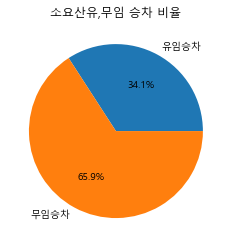

In [8]:
import csv
import matplotlib.pyplot as plt

f = open("../Data/subwayfee.csv", encoding="utf-8")
data = csv.reader(f)
header = next(data)

min_rate = 100
rate = 0
total_count = 0
min_rate_row = []
min_total_count = 0

for row in data:
    for i in [4, 6]:
        row[i] = int(row[i])
    total_count = row[4] + row[6]
    if total_count > 10000 and row[6] != 0:
        rate = row[4] / total_count
        if rate < 0.5:
            print(row, round(rate, 2))
            if min_rate > rate:
                min_rate = rate
                min_rate_row = row
                min_total_count = total_count
print(
    "유임승차 비율이 가장 낮은 역: {0}, 전체 인원: {1:,}, 유임승차인원: {2:,}, 유임승차비율: {3:,}".format(
        min_rate_row[3], min_total_count, min_rate_row[4], round(min_rate, 2)
    )
)

plt.rc("font", family="Malgun Gothic")

plt.title(min_rate_row[3] + "유,무임 승차 비율")
label = ["유임승차", "무임승차"]
values = [min_rate_row[4], min_rate_row[6]]
plt.pie(values, labels=label, autopct="%.1f%%")
plt.show()

## 모든 역의 유임,무임 승차,하차 인원 분석

In [10]:
import csv
import platform
import matplotlib.pyplot as plt

label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
pic_count = 0

with open('../Data/subwayfee.csv', encoding='utf-8') as f:
    data = csv.reader(f)
    next(data)
    if(platform.system() == 'Windows'):
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')
    
    for row in data:
        for i in range(4,8):
            row[i] = int(row[i])
        plt.figure(dpi=100)
        plt.title(row[3] + ' ' + row[1])
        plt.pie(row[4:8], labels=label, colors=c, autopct = '%.1f%%')
        plt.savefig('../Images/' + row[3] + ' ' + row[1] + '.png')
        plt.close()

        # pic_count += 1
        # if pic_count >= 10:
        #     break